EJERCICIO 1

en este ejercicio nos queda por limpiar las columnas de age y species,

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv("../../datos/attack.csv", index_col=0)

In [3]:
# modificar patron regex para que sea mas corto
# cambiar primero todos los registros a minusculas, asi que no se tiene que incluir en patron reguex

def species_name(x):
    try:
       return (re.findall(r'[Tt]iger\s[Ss]hark|[Ww]hite\s[Ss]hark|[Ll]emon\s[Ss]hark|[Bb]ull\s[Ss]hark|[Gg]rey\s[Ss]hark', x)[0]).upper()
    except:
        return np.nan

In [4]:
df['species_tipo'] = df['species_'].apply(species_name)
df['species_tipo'].unique()

array([nan, 'TIGER SHARK', 'WHITE SHARK', 'BULL SHARK', 'LEMON SHARK',
       'GREY SHARK'], dtype=object)

In [5]:
df.columns

Index(['case_number', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'age', 'time', 'species_', 'href', 'injury', 'date',
       'mes', 'fatal_', 'sex2', 'species_tipo'],
      dtype='object')

Columna de age: es una columna de tipo string pero debería ser de tipo integer. Además, en esta columna nos vamos a encontrar con algunos errores tipográficos, estos incluyen:

In [6]:
df['age'].unique()

array([nan, 'young', '14', '19', '20', '15', '21', '27', '36', '25', '6',
       '16', '50', '13 or 14', '57', '11', '48', '18', '52', '12', '32',
       '10', '34', '30', '60', '33', '29', '54', '41', '37', '56', '69',
       '38', '55', '35', '46', '45', '40s', '28', '24', '26', '49', '22',
       '7', '31', '17', '40', '13', '42', '3', '8', '82', '73', '20s',
       '68', '51', '39', '58', 'Teen', '47', '61', '65', '66', '43',
       '60s', '9', '72', '59', '64', '23', '71', '44', '62', '63', '70',
       '18 months', '53', '30s', '50s', 'teen', '77', '74', '28 & 26',
       '5', '86', '18 or 20', '12 or 13', '46 & 34', '28, 23 & 30',
       'Teens', '36 & 26', '8 or 10', '84', '\xa0 ', ' ', '30 or 36',
       '6½', '21 & ?', '75', '33 or 37', 'mid-30s', '23 & 20', ' 30',
       '7      &    31', ' 28', '20?', "60's", '32 & 30', '16 to 18',
       '87', '67', 'Elderly', 'mid-20s', 'Ca. 33', '74 ', '45 ',
       '21 or 26', '20 ', '>50', '18 to 22', 'adult', '9 & 12', '? & 19',
     

In [15]:
def edades(x):
    try:
       return (re.findall(r'\d+\b', x))
    except:
        return np.nan

In [20]:
df.shape

(6284, 19)

In [18]:
df['edad'] = df['age'].apply(edades)
df['edad'].value_counts()

[17]        154
[18]        151
[19]        143
[20]        143
[15]        139
           ... 
[32, 30]      1
[16, 18]      1
[87]          1
[21, 26]      1
[31, 33]      1
Name: edad, Length: 116, dtype: int64

In [23]:
df = df.explode('edad')

In [17]:
df.sample(20)

,case_number,year,type,country,area,location,activity,name,age,time,species_,href,injury,date,mes,fatal_,sex2,species_tipo,edad
6257,1826.05.20.R,1826.0,Unprovoked,JAMAICA,NaN,NaN,Jumped overboard,Thomas Loring,NaN,19h00-20h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,FATAL,Reported 20-May-1826,May,y,M,NaN,NaN
4139,1960.07.02.a,1960.0,Unprovoked,PAPUA NEW GUINEA,Madang,"Bimat, Bogia",Fishing,an Aid Post orderly,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Right buttock slashed,02-Jul-1960,Jul,n,M,NaN,NaN
4660,1949.08.28.b,1949.0,Unprovoked,AUSTRALIA,Queensland,Yorkeys Knob Beach near Cairns,Swimming,Brian Ware (rescuer),21,13h20,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Abdomen & chest abraded,28-Aug-1949,Aug,n,M,NaN,[21]
4075,1961.03.07,1961.0,Provoked,SOUTH AFRICA,KwaZulu-Natal,St. Lucia,Fishing,Johannes J. Rickert,44,NaN,"Zambesi shark, 4'9""",http://sharkattackfile.net/spreadsheets/pdf_di...,Landed shark in boat bit his left leg PROVOKE...,07-Mar-1961,Mar,n,M,NaN,[44]
958,2012.05.23,2012.0,Unprovoked,USA,Florida,"Jacksonville, Duval County",Surfing,Chad Refro,22,15h00,4' to 5' shark,http://sharkattackfile.net/spreadsheets/pdf_di...,Lacerations to foot,23-May-2012,May,n,M,NaN,[22]
3156,1982.01.29,1982.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Mpekeweni,Swimming,Jeffrey Phillips-Page,20,16h30,Raggedtooth shark,http://sharkattackfile.net/spreadsheets/pdf_di...,Right shin & toe lacerated,29-Jan-1982,Jan,n,M,NaN,[20]
2186,2000.08.13,2000.0,Unprovoked,USA,Florida,"South Jacksonville Beach, Duval County",Surfing / Wading,Jason Wuss,27,16h30,juvenile shark,http://sharkattackfile.net/spreadsheets/pdf_di...,Minor lacerations to the dorsum of the right foot,13-Aug-2000,Aug,n,M,NaN,[27]
4520,1953.10.00,1953.0,Provoked,AUSTRALIA,New South Wales,"Boat Harbour, north of Cronulla",NaN,Len Kosky,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,"Hit by tail of speared shark, fell & hit head ...",Oct-1953,Oct,n,M,NaN,NaN
1878,2003.11.30.b,2003.0,Unprovoked,AUSTRALIA,Western Australia,Perth? (Margaret River District),Swimming,Shane Scott,NaN,11h30,"Wobbegong shark, 1.2 m [4']",http://sharkattackfile.net/spreadsheets/pdf_di...,"After biting Halverson, it bit Scott's thigh",30-Nov-2003,Nov,n,M,NaN,NaN
4419,1956.02.10.R,1956.0,Unprovoked,AUSTRALIA,Victoria,Cowes,Swimming,Brian Hamilton,8,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Punctures to calves,Reported 10-Feb-1956,Feb,n,M,NaN,[8]


In [28]:
df['edad'] = df['edad'].astype('Int64', errors='ignore')

In [38]:
df.sample(10)

,case_number,year,type,country,area,location,activity,name,age,time,species_,href,injury,date,mes,fatal_,sex2,species_tipo,edad
676,2014.08.29.a,2014.0,Invalid,USA,Florida,"Atlantic Beach, Duval County",NaN,child,NaN,16h18,Shark involvement not confirmed,http://sharkattackfile.net/spreadsheets/pdf_di...,Shark involvement not confirmed,29-Aug-2014,Aug,NaN,NaN,NaN,<NA>
580,2015.06.17,2015.0,Unprovoked,USA,Florida,Daytona Beach Shores,Swimming,Gavin Simpson,10,13h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Minor injury to calf,17-Jun-2015,Jun,n,M,NaN,10
6081,1867.08.00,1867.0,Unprovoked,MEXICO,Veracruz,Vera Cruz Harbor,boat from the Austrian ship Elizabeth,14 crewmen,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,FATAL,Aug-1867,Aug,y,M,NaN,<NA>
5881,1888.07.13.R,1888.0,Sea Disaster,INDIA,Gujarat,Cutch Coast,The Dwarka foundered,6 crew,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,"FATAL, only 1 of her crew of 7 survived",Reported 13-Jul-1888,Jul,y,M,NaN,<NA>
3099,1983.06.15,1983.0,Unprovoked,BAHAMAS,NaN,Carter Cay,NaN,Roger Yost,30,11h00,6' blacktip shark,http://sharkattackfile.net/spreadsheets/pdf_di...,Lacerations to hand & foot,15-Jun-1983,Jun,n,M,NaN,30
1646,2006.05.10,2006.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",NaN,male,NaN,12h15,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Small lacerations to arm,05-May-2006,May,n,M,NaN,<NA>
287,2017.07.20.a,2017.0,Unprovoked,USA,California,"Seal Rock, Goleta Beach, Santa Barbara",SUP,Rolf Geyling,50,07h45,"White shark, 8' to 10'",http://sharkattackfile.net/spreadsheets/pdf_di...,"No injury, shark bit paddleboard",20-Jul-2017,Jul,n,M,WHITE SHARK,50
176,2018.06.03.a,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,FATAL,03-Jun-2018,Jun,y,M,TIGER SHARK,18
4615,1950.12.16,1950.0,Unprovoked,AUSTRALIA,Queensland,"Palm Beach North, 5 miles north of Burleigh He...",Treading water,"Desmond Quinlan, lifesaver",20,16h15,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,"FATAL, lower abdomen severely bitten & his lef...",16-Dec-1950,Dec,y,M,NaN,20
4971,1938.07.17,1938.0,Provoked,USA,California,"Dana Point, Orange County","Fishing, removing gaff from shark's mouth","Harry Griffet, passenger on fishing boat Flyer",27,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Leg bitten by gaffed shark PROVOKED INCIDENT,17-Jul-1938,Jul,n,M,NaN,27


In [52]:
df.to_csv('prueba.csv')

In [53]:
df2 = pd.read_csv('prueba.csv', na_values=[pd.NA]).fillna(np.nan)

In [51]:
type(df['edad'].unique()[0])

pandas._libs.missing.NAType

In [56]:
df.head(10)

,case_number,year,type,country,area,location,activity,name,age,time,species_,href,injury,date,mes,fatal_,sex2,species_tipo,edad
0,1800.00.00,1800.0,Unprovoked,SEYCHELLES,St. Anne,NaN,a corsair's boat was overturned,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,"FATAL, all onboard were killed by sharks",1800,NaN,y,F,NaN,<NA>
1,1797.05.28.R,1797.0,Unprovoked,NaN,NaN,NaN,Dropped overboard,child,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,FATAL,Reported May-28-1797,May,y,NaN,NaN,<NA>
2,1792.09.12,1792.0,Provoked,ENGLAND,NaN,On the Thames River,Fishing,male,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,"FATAL, PROVOKED INCIDENT",12-Sep-1792,Sep,y,M,NaN,<NA>
3,1791.00.00,1791.0,Unprovoked,AUSTRALIA,New South Wales,Port Jackson,NaN,"female, an Australian aboriginal",NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,"FATAL, ""bitten in two""",1791,NaN,y,F,NaN,<NA>
4,1788.05.10,1788.0,Boat,AUSTRALIA,New South Wales,Sydney Harbor,Fishing,boat,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,"No injury to occupants, shark bit oar and rudder",10-May-1788,May,n,NaN,NaN,<NA>
5,1787.07.05,1787.0,Unprovoked,NaN,St Helena,Landing Place,Swimming,Private Isaac Hicksled,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,FATAL,05-Jul-1787,Jul,y,M,NaN,<NA>
6,1786.08.10.R,1786.0,Unprovoked,BARBADOS,NaN,NaN,Washing himself,a sailor from the York Merchant,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,FATAL,Reported 10-Aug-1786,Aug,y,M,NaN,<NA>
7,1785.09.26.R,1785.0,Unprovoked,ENGLAND,Sussex,Brighton,NaN,NaN,NaN,NaN,Tiger shark?,http://sharkattackfile.net/spreadsheets/pdf_di...,Human remains recovered from shark,Reported 26-Sep-1785,Sep,y,M,TIGER SHARK,<NA>
8,1784.12.12,1784.0,Unprovoked,JAMAICA,NaN,Kingston,Swimming,Richard Page,NaN,22h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,12-Dec-1784,Dec,y,M,NaN,<NA>
9,1783.03.02,1783.0,Sea Disaster,MARTINIQUE,NaN,Foundering of the privateer Holker,NaN,NaN,NaN,06h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Many of the crew were taken by sharks,02-Mar-1783,Mar,y,M,NaN,<NA>


<AxesSubplot:xlabel='edad', ylabel='count'>

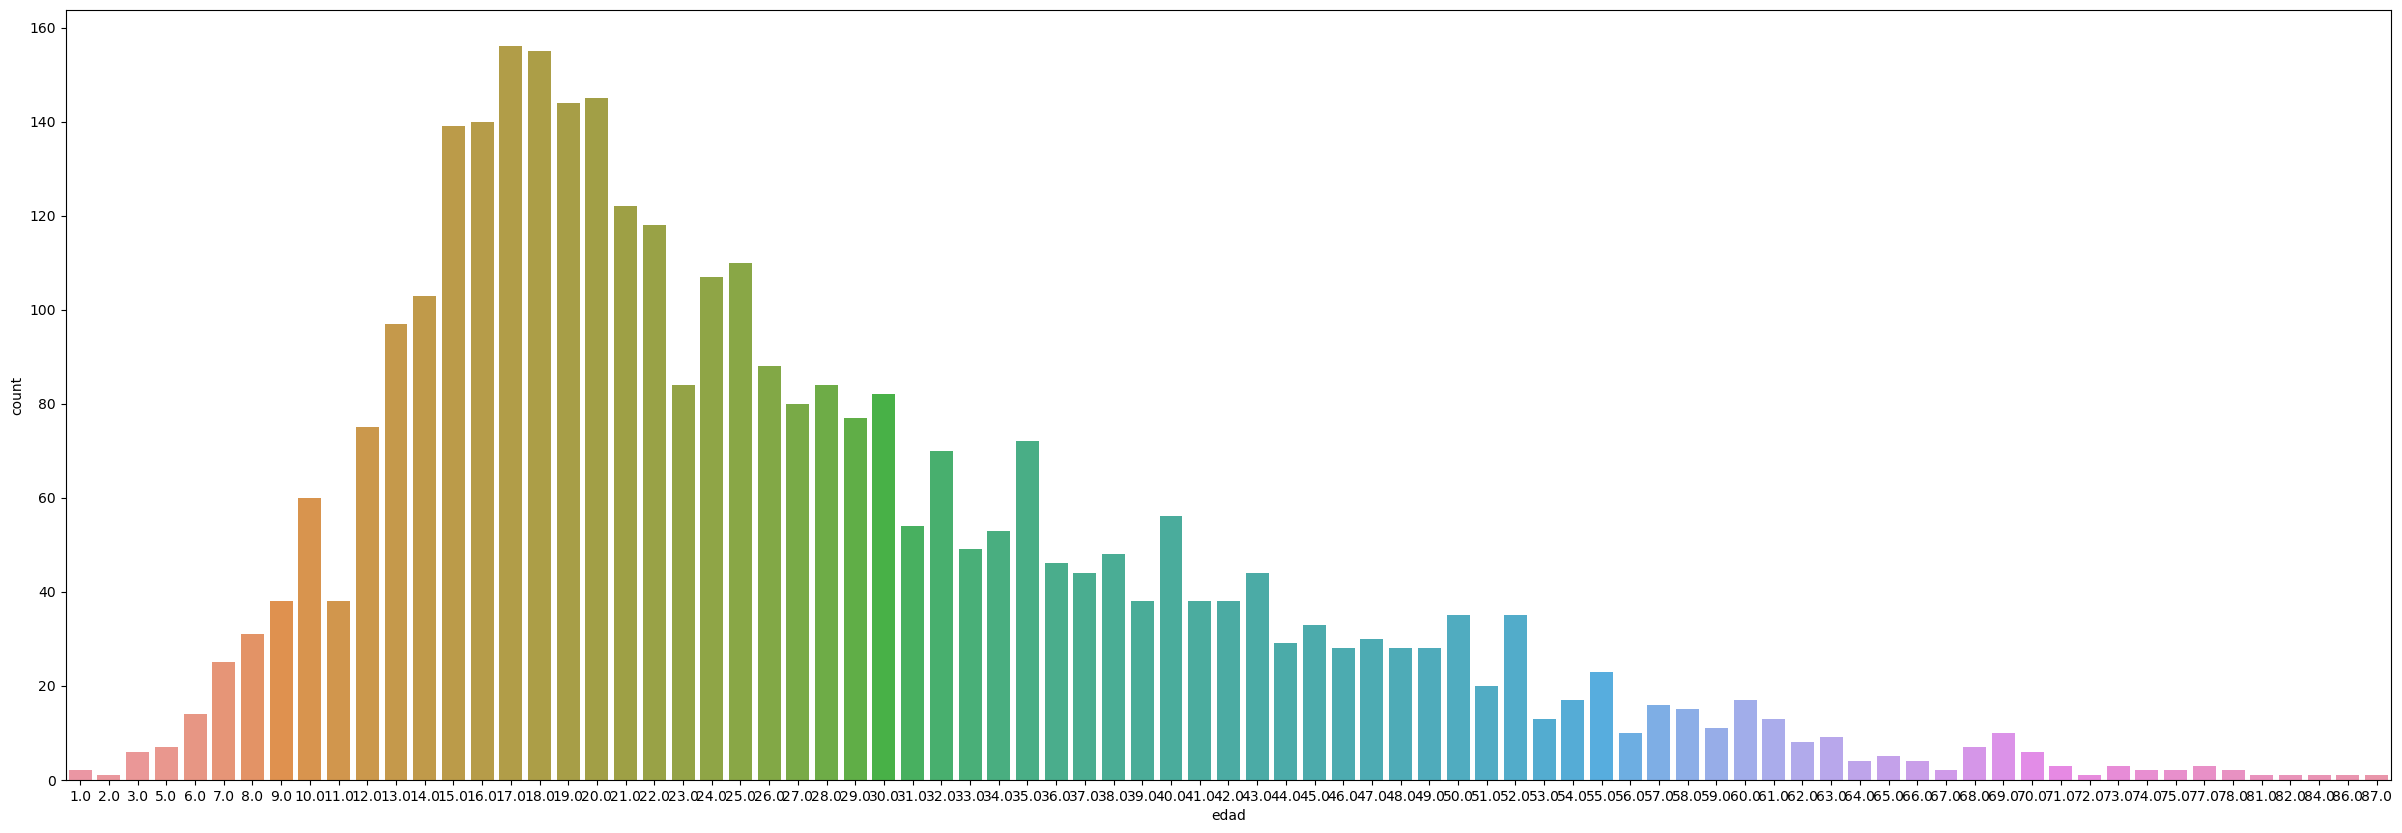

In [55]:

plt.figure(figsize=(30,10))

sns.countplot(data=df2, x='edad')

In [58]:
df2.dtypes

Unnamed: 0        int64
case_number      object
year            float64
type             object
country          object
area             object
location         object
activity         object
name             object
age              object
time             object
species_         object
href             object
injury           object
date             object
mes              object
fatal_           object
sex2             object
species_tipo     object
edad            float64
dtype: object

In [59]:
df2['edad'] = df2['edad'].astype('Int64', errors='ignore')

In [60]:
df2.dtypes

Unnamed: 0        int64
case_number      object
year            float64
type             object
country          object
area             object
location         object
activity         object
name             object
age              object
time             object
species_         object
href             object
injury           object
date             object
mes              object
fatal_           object
sex2             object
species_tipo     object
edad              Int64
dtype: object

In [61]:
plt.figure(figsize=(30,10))

sns.countplot(data=df2, x='edad')

TypeError: boolean value of NA is ambiguous

<Figure size 3000x1000 with 0 Axes>

In [64]:
df2.to_csv('../../datos/attack_limpio.csv')